In [1]:
from vedo import *
import os
from ipyvtklink.viewer import ViewInteractiveWidget
import pykitti
import numpy as np
import tensorflow as tf
import time
import pickle

#limit GPU memory ------------------------------------------------
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
  try:
    memlim = 4*1024
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=memlim)])
  except RuntimeError as e:
    print(e)
#-----------------------------------------------------------------
# tf.config.set_visible_devices([], 'GPU') #run on CPU only -- seems to actually execute main parts of code faster here...

from tensorflow.math import sin, cos, tan
import tensorflow_probability as tfp
from ICET_spherical import ICET
from utils import R_tf
from metpy.calc import lat_lon_grid_deltas

%load_ext autoreload
%autoreload 2
%autosave 180
%matplotlib notebook


2022-12-03 14:05:10.520182: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-03 14:05:11.145838: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-03 14:05:12.142710: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/derm/anaconda3/envs/py39/lib/python3.9/site-packages/cv2/../../lib64:
2022-12-03 14:05:12.143059: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_p

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-12-03 14:05:13.916514: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-03 14:05:13.918013: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 14:05:13.918353: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 14:05:13.918538: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Autosaving every 180 seconds


In [2]:
# test- raw Pixell data?
prefix = "/media/derm/06EF-127D2/leddartech/20200721_144638_part36_1956_2229/pixell_bfc_ech/" #test
fn1 = prefix + "00000150.pkl"
with open(fn1, 'rb') as f:
    data = pickle.load(f)
# print(data)
data = data['data'] #just want to hold on to Pixell measurements
# print(np.shape(data))

In [3]:
#Ouster OS1-64 mechanical LiDAR + FLIR
prefix = "/home/derm/Downloads/20200721_144638_part36_1956_2229/ouster64_bfc_xyzit/" #very good quality
fn1 = prefix + "00000138.pkl"
with open(fn1, 'rb') as f:
    data1 = pickle.load(f)
data1 = np.asarray(data1.tolist())[:,:3]

fn2 = prefix + "00000139.pkl"
with open(fn2, 'rb') as f:
    data2 = pickle.load(f)
data2 = np.asarray(data2.tolist())[:,:3]

# data1 = data1[data1[:,2] > -0.75] #ignore ground plane
# data2 = data2[data2[:,2] > -0.75] #ignore ground plane

In [4]:
plt1 = Plotter(N = 1, axes = 4, bg = (1, 1, 1), interactive = True)
disp = []
disp.append(Points(data1, c = 'red', r = 2.5, alpha = 1))
disp.append(Points(data2, c = 'blue', r = 2.5, alpha = 1))
plt1.show(disp, "Fig LedderTech")
ViewInteractiveWidget(plt1.window)

ViewInteractiveWidget(height=1376, layout=Layout(height='auto', width='100%'), width=2488)

In [5]:
it = ICET(cloud1 = data1, cloud2 = data2, fid = 80, niter = 10, 
           draw = True, group = 2, RM = True, DNN_filter = False)
ViewInteractiveWidget(it.plt.window)


 getting bounds took 0.06748604774475098 seconds

 took  0.032182931900024414 seconds to get points in cluster

 took  0.021033525466918945 seconds to get points in cluster

 took  0.014944076538085938 seconds to get points in cluster

 took  0.02049541473388672 seconds to get points in cluster


2022-12-03 14:09:28.148247: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-12-03 14:09:28.221429: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x1bddbd50



 took  0.033473968505859375 seconds to get points in cluster

 estimated solution vector X: 
 tf.Tensor([ 0.13920516 -0.01797573 -0.02250152  0.00417266  0.00573027  0.01341935], shape=(6,), dtype=float32)

 took  0.03337264060974121 seconds to get points in cluster

 estimated solution vector X: 
 tf.Tensor([ 0.24078326  0.00305131 -0.02166837  0.00423222  0.00573102  0.01365515], shape=(6,), dtype=float32)

 took  0.02592921257019043 seconds to get points in cluster

 estimated solution vector X: 
 tf.Tensor([ 0.32236034  0.02051656 -0.02143196  0.00424842  0.00564313  0.01363401], shape=(6,), dtype=float32)

 took  0.026564598083496094 seconds to get points in cluster

 estimated solution vector X: 
 tf.Tensor([ 0.4198266   0.03841873 -0.020949    0.00433701  0.00554377  0.01404156], shape=(6,), dtype=float32)

 took  0.02654552459716797 seconds to get points in cluster

 estimated solution vector X: 
 tf.Tensor([ 0.5013289   0.05345571 -0.02057776  0.00434983  0.00543453  0.013996

ViewInteractiveWidget(height=1043, layout=Layout(height='auto', width='100%'), width=1280)

In [6]:
#TEST- get ground truth bf movement
# prefix = "/home/derm/Downloads/20200721_144638_part36_1956_2229/peakcan_fcc_Speed/"
prefix = "/home/derm/Downloads/20200721_144638_part36_1956_2229/sbgekinox_bcc_navposvel/"
# prefix = "/home/derm/Downloads/20200721_144638_part36_1956_2229/sbgekinox_bcc_ekfeuler/"

fn1 = prefix + "00000000.pkl"
with open(fn1, 'rb') as f:
    data = pickle.load(f)

data = np.asarray(data.tolist())
print(np.shape(data))
print(data[:2])

(200, 15)
[[ 3.85002541e+09 -3.26287961e+00  4.33401775e+00 -4.15053256e-02
   8.37341137e-03  8.54204874e-03  5.06517012e-03  4.55057967e+01
  -7.35583985e+01  1.65464702e+01 -3.15371780e+01  2.20253132e-02
   2.04579420e-02  2.17356030e-02  1.34490352e+08]
 [ 3.85004541e+09 -3.27760315e+00  4.35094690e+00 -3.99488695e-02
   8.39528348e-03  8.56361352e-03  5.07417321e-03  4.55057961e+01
  -7.35583973e+01  1.65472666e+01 -3.15371780e+01  2.21402310e-02
   2.05782969e-02  2.18070578e-02  1.34490352e+08]]


<IPython.core.display.Javascript object>


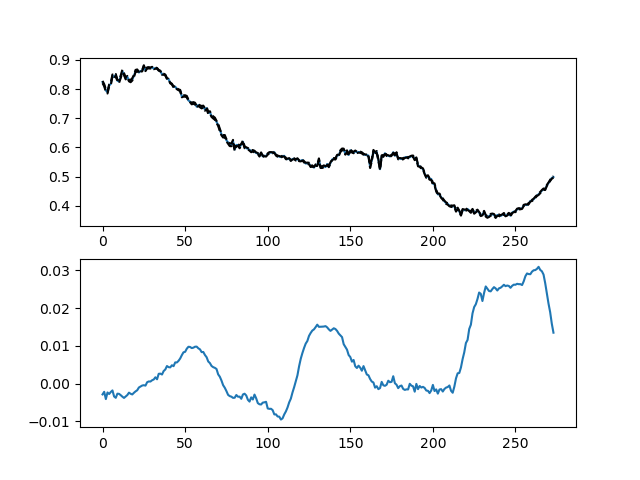

[1.98177854e-03 1.54494634e-03 2.83008034e-04 2.86572013e-05
 4.38870884e-05 7.88986508e-05]


In [7]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(2,1)

x_hist = np.loadtxt("leddartech_ICET_estimates.txt")
pred_stds = np.loadtxt("leddartech_ICET_pred_stds.txt")
print(pred_stds[0])

ax[0].plot(x_hist[:,0])
ax[0].plot(x_hist[:,0]+ 2*pred_stds[:,0], c = 'k', ls = '--')
ax[0].plot(x_hist[:,0]- 2*pred_stds[:,0], c = 'k', ls = '--')
ax[1].plot(x_hist[:,5])

# Using Ouster Sample Dataset and Ouster-SDK

In [179]:
import pandas as pd
fn1 = "/media/derm/06EF-127D2/Ouster/csv/pcap_out_000000.csv"
df1 = pd.read_csv(fn1, sep=',', skiprows=[0])
pc1 = df1.values[:,8:11]*0.001 #1st return
# pc1 = df1.values[:,11:14]*0.001 #2nd return
# print(pc1)
fn2 = "/media/derm/06EF-127D2/Ouster/csv/pcap_out_000301.csv"
df2 = pd.read_csv(fn2, sep=',', skiprows=[0])
pc2 = df2.values[:,8:11]*0.001

# pc1 = pc1[pc1[:,2] > -1.25] #ignore ground plane
# pc2 = pc2[pc2[:,2] > -1.25] #ignore ground plane

T = np.array([0.124,0.,0.]) #ground truth transform for scans 0,1
pc2 += T

signal_miss_idx = np.where(pc1 == np.array([0., 0., 0.]))
print(np.shape(signal_miss_idx[0]))

(61570,)


In [223]:
plt2 = Plotter(N = 1, axes = 4, bg = (1, 1, 1), interactive = True)
disp = []

#color by z height
# zheight = (15*(pc1[:,2]+3)) #was this
# cname = np.array([zheight, 80*np.ones(len(zheight)), 80*np.ones(len(zheight))]).T.tolist()
zheight = 128*(np.sin(0.5*pc1[:,2])+1) #test
cname = np.array([zheight, 128*(np.sin(0.5*pc1[:,2]+256)+1), 128*np.ones(len(zheight))]).T.tolist()
print(zheight)
points_object1 = Points(pc1, c = cname, r = 3, alpha = 0.5)
disp.append(points_object1)

#constant color
# disp.append(Points(pc1, c = 'red', r = 2.5, alpha = 1)) 
# disp.append(Points(pc2, c = 'blue', r = 2.5, alpha = 1)) 
plt2.show(disp, "Fig Ouster")
ViewInteractiveWidget(plt2.window)

[202.1214965  164.42923025 195.73056309 ... 128.         128.
 128.        ]


ViewInteractiveWidget(height=1376, layout=Layout(height='auto', width='100%'), width=2488)

In [177]:
it = ICET(cloud1 = pc1, cloud2 = pc2, fid = 80, niter = 10, 
           draw = True, group = 2, RM = True, DNN_filter = False)
ViewInteractiveWidget(it.plt.window)


 getting bounds took 0.024755239486694336 seconds

 took  0.03945612907409668 seconds to get points in cluster

 took  0.017455339431762695 seconds to get points in cluster

 took  0.015236854553222656 seconds to get points in cluster

 took  0.015457868576049805 seconds to get points in cluster

 took  0.03697824478149414 seconds to get points in cluster

 estimated solution vector X: 
 tf.Tensor([ 0.51286554  0.00860972  0.03681847  0.00357206 -0.00187375 -0.00176741], shape=(6,), dtype=float32)

 took  0.035631656646728516 seconds to get points in cluster

 estimated solution vector X: 
 tf.Tensor([ 0.77913386  0.01257494  0.0495924   0.00331596 -0.00152002 -0.00005341], shape=(6,), dtype=float32)

 took  0.03612780570983887 seconds to get points in cluster

 estimated solution vector X: 
 tf.Tensor([ 0.7910893   0.01318692  0.04823647  0.00306326 -0.00177533  0.00022363], shape=(6,), dtype=float32)

 took  0.03924083709716797 seconds to get points in cluster

 estimated solution v

ViewInteractiveWidget(height=1043, layout=Layout(height='auto', width='100%'), width=1280)

<IPython.core.display.Javascript object>


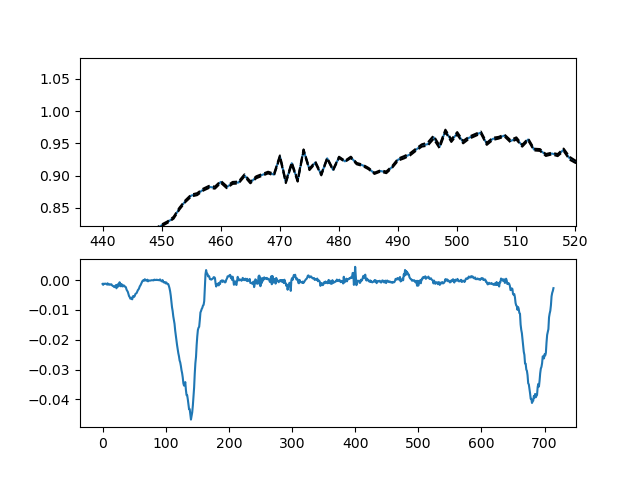

[0.0009376  0.00015147 0.00007096 0.00001478 0.00001124 0.00003309]


In [172]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(2,1)

x_hist = np.loadtxt("ouster_ICET_estimates.txt")
pred_stds = np.loadtxt("ouster_ICET_pred_stds.txt")
print(pred_stds[0])

ax[0].plot(x_hist[:,0])
ax[0].plot(x_hist[:,0]+ 2*pred_stds[:,0], c = 'k', ls = '--')
ax[0].plot(x_hist[:,0]- 2*pred_stds[:,0], c = 'k', ls = '--')
ax[1].plot(x_hist[:,5])

In [56]:
#read in raw PCAP files directly from Ouster Sample dataset
#  need to use ouster-sdk (not as good as velodyne)
from ouster import pcap
from ouster.pcap import _pcap
from ouster import client
from ouster.client import _client

pcap_path = "/media/derm/06EF-127D2/Ouster/OS-1-128_v2.3.0_1024x10_20220419_160551-000.pcap"
metadata_path = '/media/derm/06EF-127D2/Ouster/OS-1-128_v2.3.0_1024x10_20220419_160551.json'



with open(metadata_path, 'r') as f:
    metadata = client.SensorInfo(f.read())

source = pcap.Pcap(pcap_path, metadata)


In [40]:
# pcap_to_csv(source, metadata)

In [168]:
from typing import Tuple, List

def pcap_to_csv(source: client.PacketSource,
                metadata: client.SensorInfo,
                num: int = 0,
                csv_dir: str = ".",
                csv_base: str = "pcap_out",
                csv_ext: str = "csv") -> None:
    """Write scans from a pcap to csv files (one per lidar scan).

    The number of saved lines per csv file is always H x W, which corresponds to
    a full 2D image representation of a lidar scan.

    Each line in a csv file is (for LEGACY profile):

        TIMESTAMP, RANGE (mm), SIGNAL, NEAR_IR, REFLECTIVITY, X (mm), Y (mm), Z (mm)

    If ``csv_ext`` ends in ``.gz``, the file is automatically saved in
    compressed gzip format. :func:`.numpy.loadtxt` can be used to read gzipped
    files transparently back to :class:`.numpy.ndarray`.

    Args:
        source: PacketSource from pcap
        metadata: associated SensorInfo for PacketSource
        num: number of scans to save from pcap to csv files
        csv_dir: path to the directory where csv files will be saved
        csv_base: string to use as the base of the filename for pcap output
        csv_ext: file extension to use, "csv" by default
    """

    dual = False
    if metadata.format.udp_profile_lidar == client.UDPProfileLidar.PROFILE_LIDAR_RNG19_RFL8_SIG16_NIR16_DUAL:
        dual = True
        print("Note: You've selected to convert a dual returns pcap to CSV. Each row "
              "will represent a single pixel, so that both returns for that pixel will "
              "be on a single row. As this is an example we provide for getting "
              "started, we realize that you may have conversion needs which are not met "
              "by this function. You can find the source code on the Python SDK "
              "documentation website to modify it for your own needs.")

    # ensure that base csv_dir exists
    if not os.path.exists(csv_dir):
        os.makedirs(csv_dir)

    # construct csv header and data format
    def get_fields_info(scan: client.LidarScan) -> Tuple[str, List[str]]:
        field_names = 'TIMESTAMP (ns)'
        field_fmts = ['%d']
        for chan_field in scan.fields:
            field_names += f', {chan_field}'
            if chan_field in [client.ChanField.RANGE, client.ChanField.RANGE2]:
                field_names += ' (mm)'
            field_fmts.append('%d')
        field_names += ', X (mm), Y (mm), Z (mm)'
        field_fmts.extend(3 * ['%d'])
        if dual:
            field_names += ', X2 (mm), Y2 (mm), Z2 (mm)'
            field_fmts.extend(3 * ['%d'])
        return field_names, field_fmts

    field_names: str = ''
    field_fmts: List[str] = []

    # [doc-stag-pcap-to-csv]
    from itertools import islice
    # precompute xyzlut to save computation in a loop
    xyzlut = client.XYZLut(metadata)

    # create an iterator of LidarScans from pcap and bound it if num is specified
    scans = iter(client.Scans(source))
    if num:
        scans = islice(scans, num)

    for idx, scan in enumerate(scans):

        # initialize the field names for csv header
        if not field_names or not field_fmts:
            field_names, field_fmts = get_fields_info(scan)

        # copy per-column timestamps for each channel
        timestamps = np.tile(scan.timestamp, (scan.h, 1))

        # grab channel data
        fields_values = [scan.field(ch) for ch in scan.fields]

        # use integer mm to avoid loss of precision casting timestamps
        xyz = (xyzlut(scan.field(client.ChanField.RANGE)) * 1000).astype(
            np.int64)

        if dual:
            xyz2 = (xyzlut(scan.field(client.ChanField.RANGE2)) * 1000).astype(
                np.int64)

            # get all data as one H x W x num fields int64 array for savetxt()
            frame = np.dstack((timestamps, *fields_values, xyz, xyz2))

        else:
            # get all data as one H x W x num fields int64 array for savetxt()
            frame = np.dstack((timestamps, *fields_values, xyz))

        # not necessary, but output points in "image" vs. staggered order
        frame = client.destagger(metadata, frame)

        # write csv out to file
        csv_path = os.path.join(csv_dir, f'{csv_base}_{idx:06d}.{csv_ext}')
        print(f'write frame #{idx}, to file: {csv_path}')

        header = '\n'.join([f'frame num: {idx}', field_names])

        np.savetxt(csv_path,
                   frame.reshape(-1, frame.shape[2]),
                   fmt=field_fmts,
                   delimiter=',',
                   header=header)

    # [doc-etag-pcap-to-csv]

In [162]:
def xyz_proj(metadata: client.SensorInfo,
             scan: client.LidarScan) -> np.ndarray:
    """Computes a point cloud from a scan as numpy array.

    This is a reference implementation that follows the calculations from
    `Section 3.1.2`_ of the Software User Manual exactly. Output is a point
    cloud in the *sensor frame* with points arranged in column-major order,
    with coordinates in meters.

    Args:
        metadata: Sensor metadata associated with the scan
        scan: A frame of lidar data

    Returns:
        A H x W x 3 array of point coordinates

    .. _Section 3.1.2: https://data.ouster.io/downloads/software-user-manual/software-user-manual-v2p0.pdf#a
    """
#     https://static.ouster.dev/sdk-docs/_modules/ouster/sdk/examples/reference.html#xyz_proj

    # use homogeneous coordinates for convenient transformation
    xyz = np.zeros((scan.w * scan.h, 4))

    # iterate over each measurement channel/row and measurement block/column
    for u, v in product(range(scan.h), range(scan.w)):

        r = scan.field(client.ChanField.RANGE)[u, v]
        n = metadata.lidar_origin_to_beam_origin_mm

        # scans are always a full frame, so the measurement id is also the index
        assert scan.measurement_id[v] == v

        theta_encoder = 2.0 * pi * (1.0 - v / scan.w)
        theta_azimuth = -2.0 * pi * (metadata.beam_azimuth_angles[u] / 360.0)
        phi = 2.0 * pi * (metadata.beam_altitude_angles[u] / 360.0)

        # zero ranges represent no return; avoid applying offsets to these
        if r == 0.0:
            continue

        # compute point coordinates in the lidar frame
        x = (r - n) * cos(theta_encoder +
                          theta_azimuth) * cos(phi) + n * cos(theta_encoder)
        y = (r - n) * sin(theta_encoder +
                          theta_azimuth) * cos(phi) + n * sin(theta_encoder)
        z = (r - n) * sin(phi)

        # insert into xyz; point order is row-major to match input scan
        xyz[u * scan.w + v] = [x, y, z, 1]

    # transform from lidar to sensor frame and scale to meters
    xyz_sensor = xyz @ metadata.lidar_to_sensor_transform.T
    return xyz_sensor[:, :3].reshape(scan.h, scan.w, 3) * 0.001

In [160]:
#suggested method of reading pcap files Ouster unit
for packet in source:
    if isinstance(packet, client.LidarPacket):
        # Now we can process the LidarPacket. In this case, we access
        # the measurement ids, timestamps, and ranges
        measurement_ids = packet.measurement_id
        timestamps = packet.timestamp
        ranges = packet.field(client.ChanField.RANGE)
        print(f'  encoder counts = {measurement_ids.shape}')
        print(f'  timestamps = {timestamps.shape}')
        print(f'  ranges = {ranges.shape}')

    elif isinstance(packet, client.ImuPacket):
        # and access ImuPacket content
        print(f'  acceleration = {packet.accel}')
        print(f'  angular_velocity = {packet.angular_vel}')


  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  acceleration = [-1.04248047e-01 -9.76562500e-04  1.02246094e+00]
  angular_velocity = [ 0.57983398 -0.52642822 -1.27410889]
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  acceleration = [-0.0690918  -0.05834961  1.00439453]
  angular_velocity = [ 0.2746582  -0.9765625  -1.05285645]
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,

  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  acceleration = [ 0.00537109 -0.06298828  1.02075195]
  angular_velocity = [-0.01525879  0.51116943  0.22125244]
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  acceleration = [-0.0246582   0.04101562  1.01782227]
  angular_velocity = [ 0.90789795  0.01525879 -0.86212158]
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (12

  angular_velocity = [  3.61633301   6.54602051 -20.38574219]
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  acceleration = [ 0.12255859 -0.25366211  1.04394531]
  angular_velocity = [  4.07409668   8.29315186 -19.59228516]
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts 

  acceleration = [0.07910156 0.06494141 1.00195312]
  angular_velocity = [ 0.12969971 -1.98364258  0.37384033]
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  acceleration = [ 0.06298828 -0.05297852  0.95751953]
  angular_velocity = [-0.19073486  2.00653076 -0.77819824]
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps 

  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  acceleration = [0.67895508 0.33789062 0.94335938]
  angular_velocity = [-2.89916992 15.15197754 -0.43487549]
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  acceleration = [

  angular_velocity = [-0.49591064 -2.17437744  0.2822876 ]
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  acceleration = [-0.02392578  0.02124023  0.98608398]
  angular_velocity = [-0.64086914  4.3182373  -0.12207031]
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,

  angular_velocity = [ 1.48773193 -4.59289551 -0.73242188]
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  acceleration = [0.16455078 0.02612305 1.02392578]
  angular_velocity = [ 1.52587891 -4.66918945 -0.22888184]
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
  timestamps = (16,)
  ranges = (128, 16)
  encoder counts = (16,)
 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [57]:
for packet in source:
#     print(packet)
    if isinstance(packet, client.LidarPacket):
        test = packet
        print("Done")
        break


Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
